# Exploratory Data Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [57]:
# import dataset
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There is missing values in some columns
We impute 'Age' column with its mean, 'Embarked' Column with iths mode and 'Cabin' column with 'Unknown'

In [59]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Cabin'] = data['Cabin'].fillna('Unknown')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Now we have removed all the missing values

In [108]:
print("Unique values in each column:")
for col in data.columns:
    print(f'\t{col} : {data[col].unique().shape[0]} unique values')

Unique values in each column:
	PassengerId : 891 unique values
	Survived : 2 unique values
	Pclass : 3 unique values
	Name : 891 unique values
	Sex : 2 unique values
	Age : 89 unique values
	SibSp : 7 unique values
	Parch : 7 unique values
	Ticket : 681 unique values
	Fare : 248 unique values
	Cabin : 148 unique values
	Embarked : 3 unique values
	PClass : 3 unique values


Passengre ID, and Name has all unique values and Ticket has more than half unique values. These cannot provide any useful information. So, we can drop these columns

In [109]:
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

## Summary Statistics

In [110]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


## Histogram and Box Plot

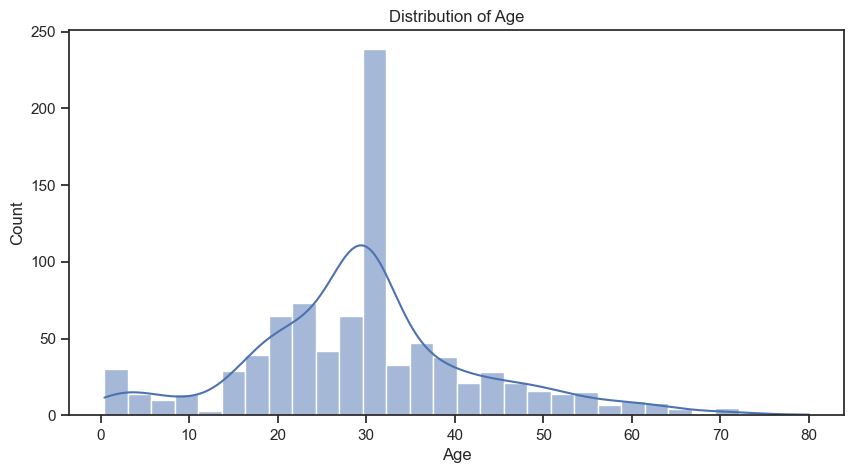

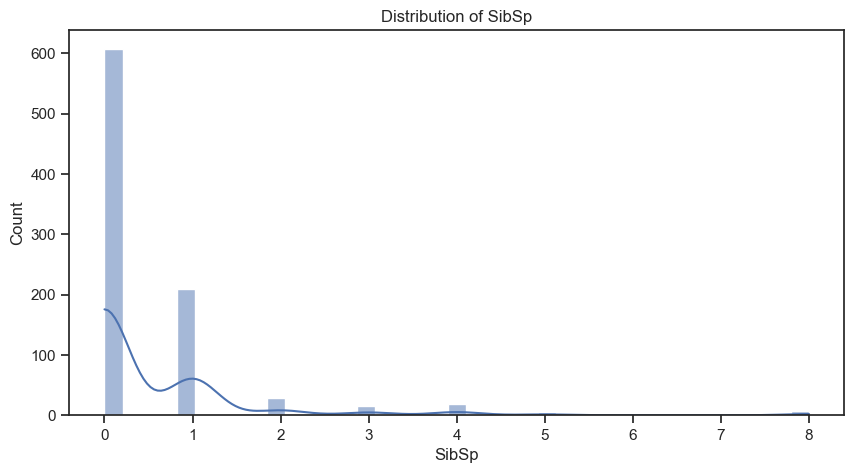

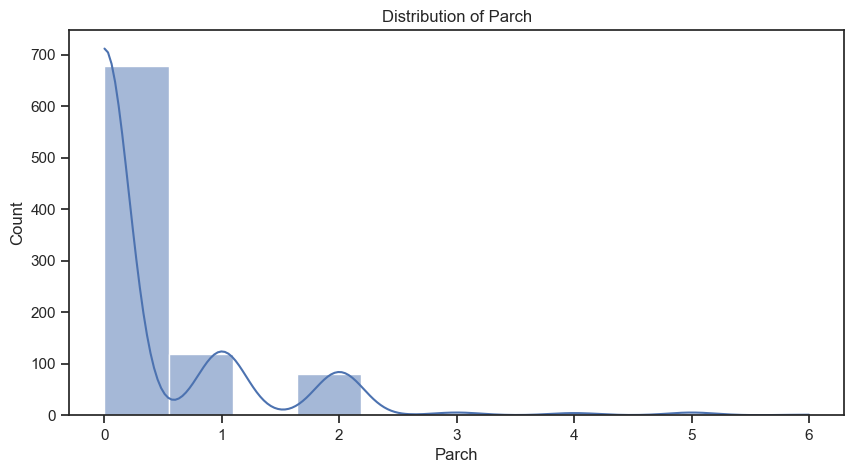

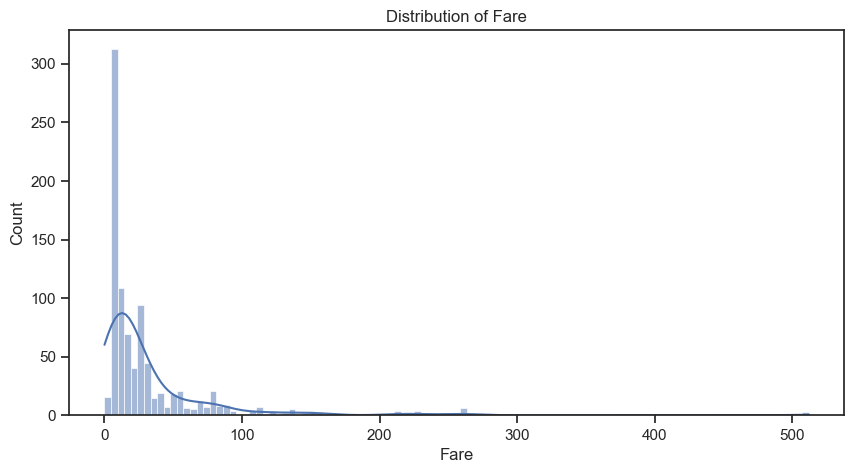

In [114]:
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

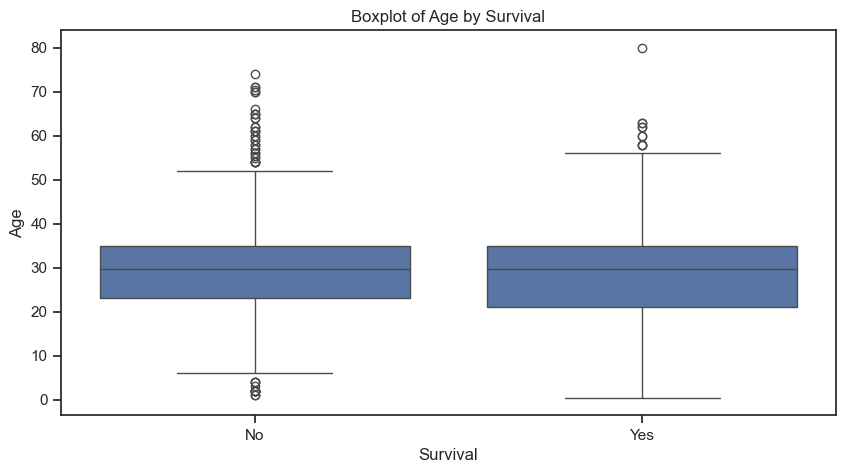

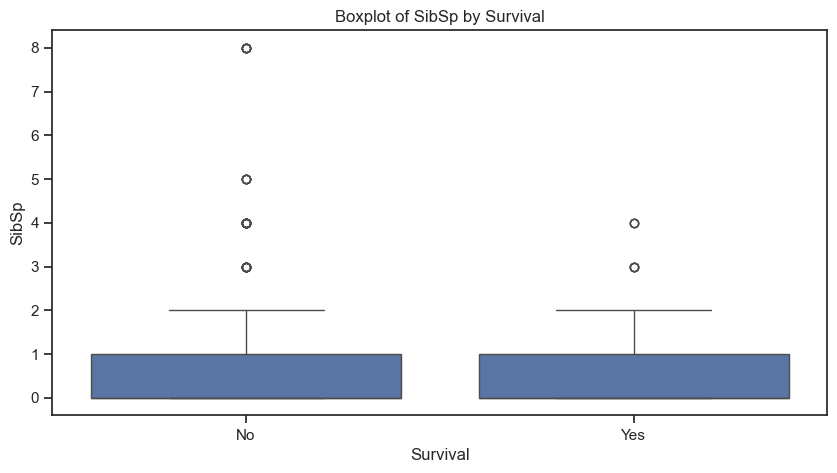

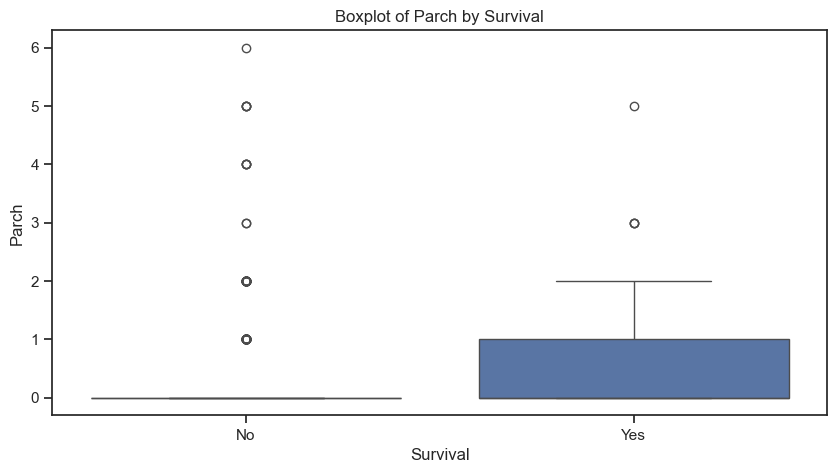

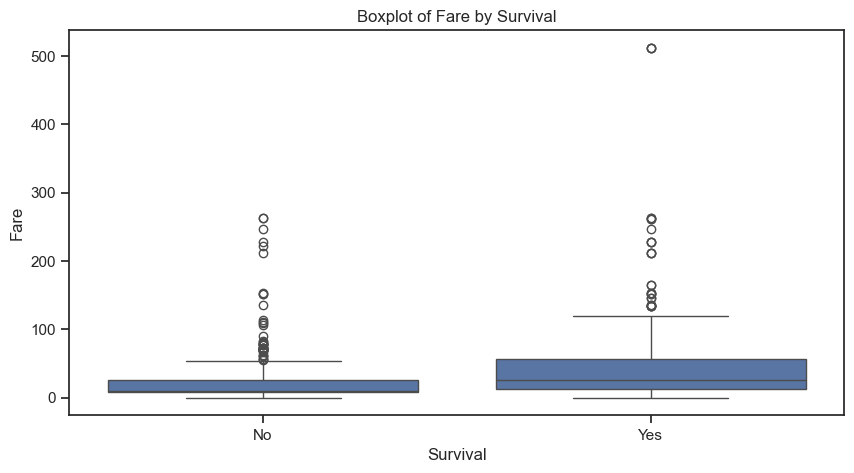

In [118]:
for col in data.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Survived', y=col, data=data)
    plt.xlabel('Survival')
    plt.ylabel(col)
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.title(f'Boxplot of {col} by Survival')
    plt.show()

## PaiPlot and Correlation Matrix

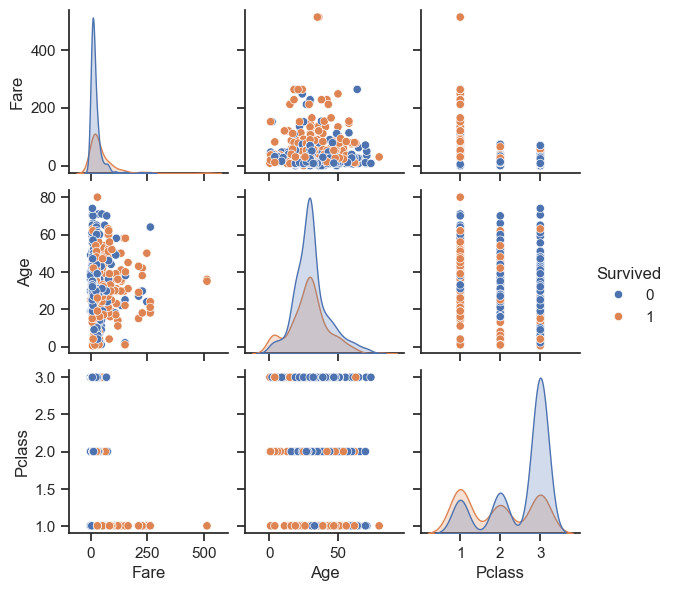

In [119]:

sns.set(style="ticks", color_codes=True)
sns.pairplot(data,height=2,vars = [ 'Fare','Age','Pclass'], hue="Survived")
plt.show()


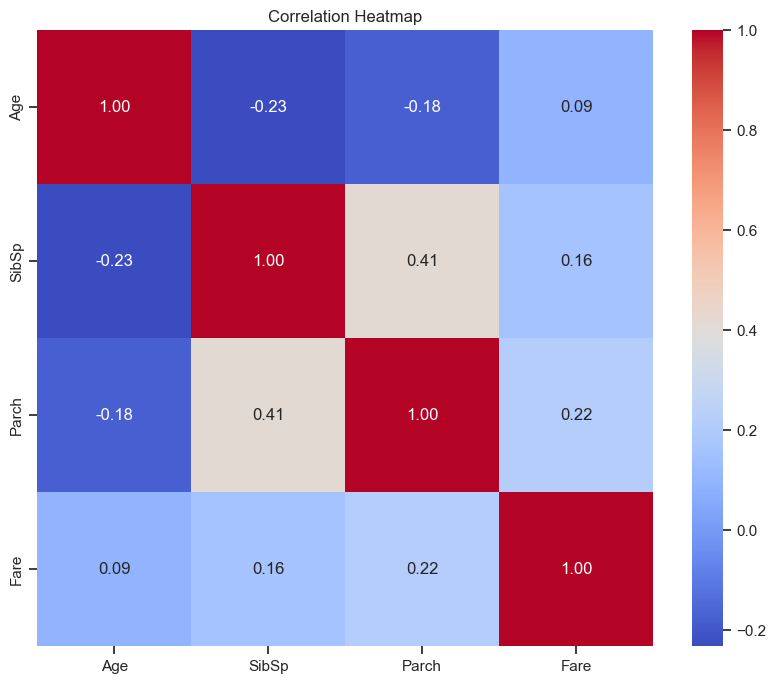

In [121]:
corr = data.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


## Trends and Patterns

Now, let's visualize the data using seaborn and plotly.

In [101]:
data['Survived'] = data['Survived'].astype(str)
data['Pclass'] = data['Pclass'].astype(int)

C:\Users\nida5\AppData\Local\Temp\ipykernel_18516\4119405213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='Set1')


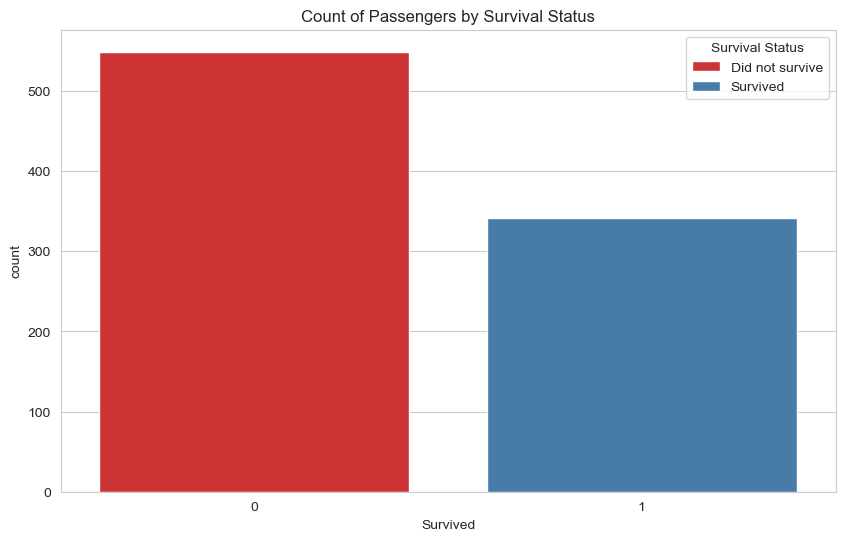

In [64]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=data, palette='Set1')
plt.title('Count of Passengers by Survival Status')
plt.legend(title='Survival Status', labels=['Did not survive', 'Survived'])
plt.show()

We can clearly understand that number of passengers not survived is very much higher than the passengers who could survive

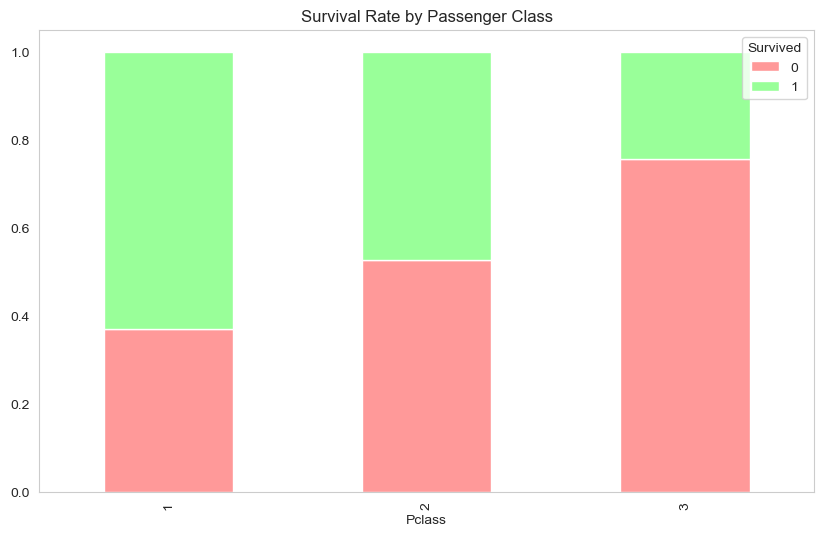

In [65]:
PC = data.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()
PC.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999', '#99FF99'])
plt.title('Survival Rate by Passenger Class')
plt.grid(False)

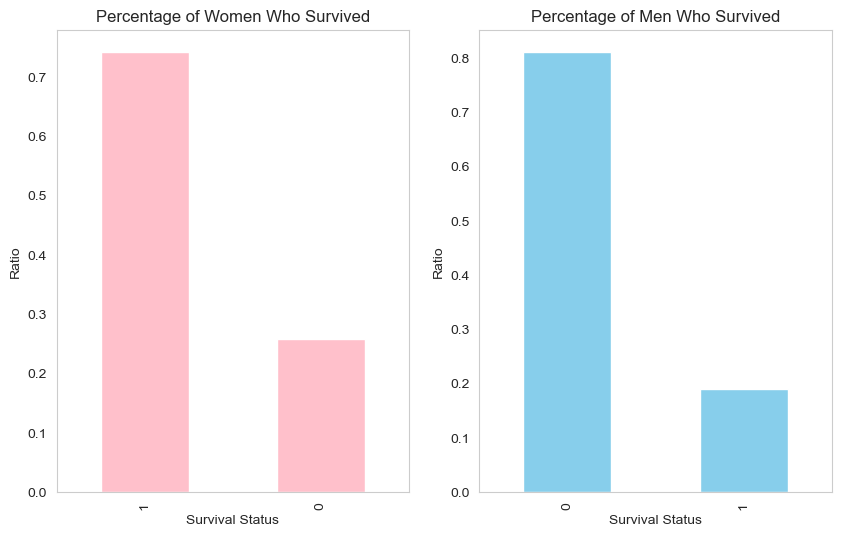

In [66]:
plt.subplot(1, 2, 1)
(data.loc[data['Sex'] == 'female']['Survived']).value_counts(normalize=True).plot(kind='bar', color = 'pink', figsize=(10, 6))
plt.title('Percentage of Women Who Survived')
plt.xlabel('Survival Status')
plt.ylabel('Ratio')
plt.grid(False)

plt.subplot(1, 2, 2)
(data.loc[data['Sex'] == 'male']['Survived']).value_counts(normalize=True).plot(kind='bar', color = 'skyblue', figsize=(10, 6))
plt.title('Percentage of Men Who Survived')
plt.xlabel('Survival Status')
plt.ylabel('Ratio')
plt.grid(False)

70% of women survived while 30% could not survive while 80% of men couldnot survive. This shows that rescue attempts for women was given more priority 

<Figure size 1000x600 with 0 Axes>

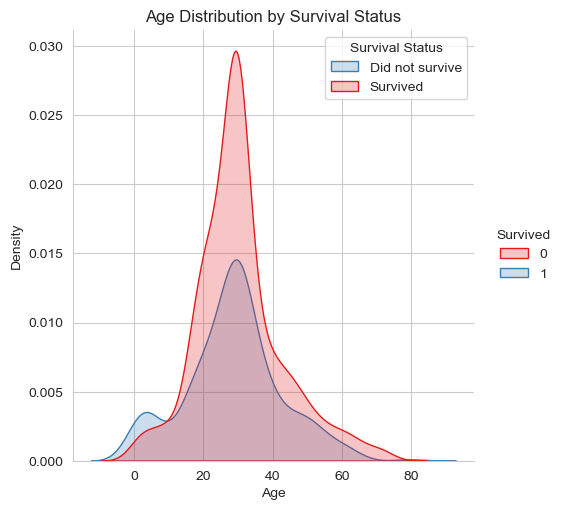

In [67]:

plt.figure(figsize=(10, 6))
sns.displot(data=data, x='Age', hue='Survived', kind='kde', fill=True, palette='Set1')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survival Status', labels=['Did not survive', 'Survived'])
plt.show()

This shows number of people survived and not survived are mostly in the age group 15 to 45. This shows majority of the passengers were in that age group. But, steep peak in the curve of people who could not survive between 20-40 portray that priority was given to children and elderly people during the rescue process.

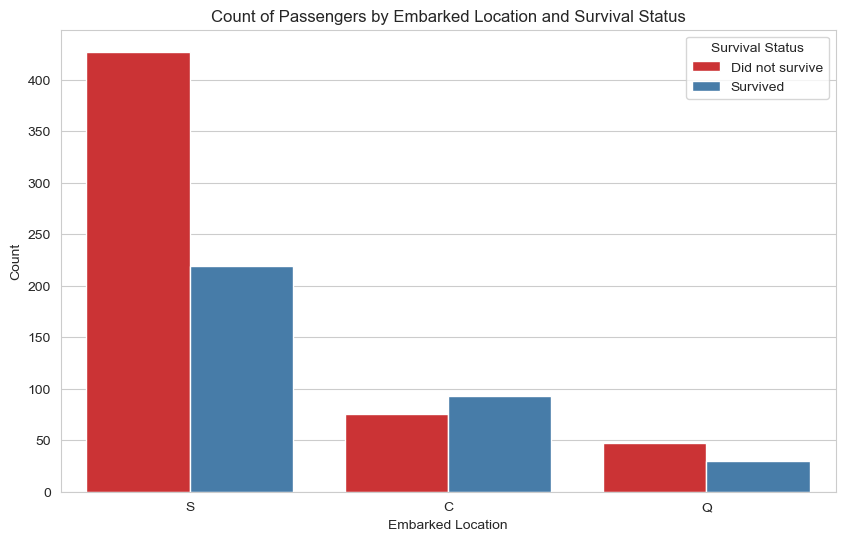

In [70]:
data['Survived'] = data['Survived'].astype(str)
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=data, palette='Set1')
plt.title('Count of Passengers by Embarked Location and Survival Status')
plt.xlabel('Embarked Location')
plt.ylabel('Count') 
plt.legend(title='Survival Status', labels=['Did not survive', 'Survived'])
plt.show()

The number of people to the location with code 'S' was significantly higher than the other two locations. More than half the people to location 'S' could not survie.

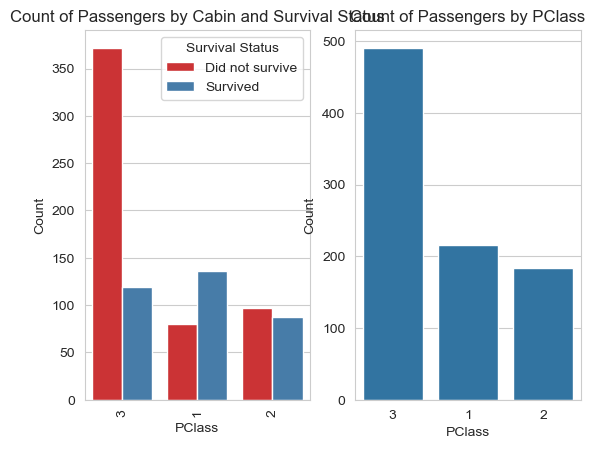

In [ ]:
plt.subplot(1, 2, 1)
sns.countplot(x='PClass', hue='Survived', data=data, palette='Set1')
plt.title('Count of Passengers by Cabin and Survival Status')
plt.xlabel('PClass')
plt.ylabel('Count')
plt.legend(title='Survival Status', labels=['Did not survive', 'Survived'])

plt.subplot(1, 2, 2)
sns.countplot(x='PClass', data=data)
plt.title('Count of Passengers by PClass')
plt.xlabel('PClass')
plt.ylabel('Count')
plt.show()

The total number of passengers from Passenger Class 3 is far higher than the other two classes. Out of total of about 500 passengers from PClass 3, only lass than 150 people could survive. On the other hand, out of total 200 passengers from PClass 1, almost 150 people could survive. 
This indicate the preference given to 1st Class Passengers during the rescue process 